In [35]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib notebook

In [36]:
import labrad
cxn = labrad.connect()

In [37]:
ss = cxn.mj_serial_server

In [39]:
ss.open('/dev/ttyACM4')

'/dev/ttyACM4'

In [40]:
ss.baudrate(115200)

115200

In [42]:
ss.read()

''

num_clicks= 99
mean:  -4.12781790379e-10
sigma:  -9.28026299044e-11


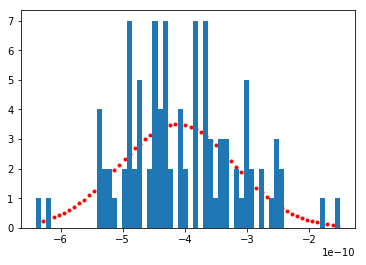

In [33]:
%matplotlib inline
data_set = []
ss.read()
for i in range(100):
    data = ss.read_line()
    try:
        data_set.append(float(data[0:14]))
    except:
        continue
    time.sleep(0.05)
n, bins, patches = plt.hist(np.array(data_set), 60)
bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])
popt, pcov = curve_fit(func, bin_centers, n, p0 = [np.max(n), bins[np.argmax(n)]/5., bins[np.argmax(n)]])
plt.scatter(bin_centers, func(bin_centers, *popt), color='red', marker='.')
mean = popt[2]
sigma = popt[1]
print 'num_clicks=', len(data_set)
print 'mean: ', mean
print 'sigma: ', sigma

In [7]:
def func(x_values, A, sigma, x0):
    return A/(sigma*np.sqrt(2*np.pi))*np.exp(-(x_values-x0)**2/(2*sigma**2))

num_clicks= 98
mean:  -5.0656249162e-10
sigma:  -1.04977931343e-10


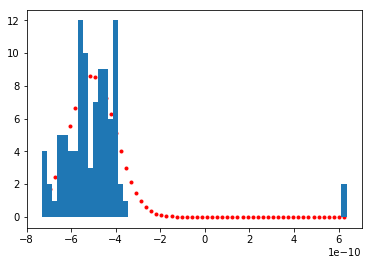

In [45]:
%matplotlib inline
data_set = []
ss.read()
for i in range(100):
    data = ss.read_line()
    try:
        data_set.append(float(data[0:14]))
    except:
        continue
    time.sleep(0.05)
n, bins, patches = plt.hist(np.array(data_set), 60)
bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])
popt, pcov = curve_fit(func, bin_centers, n, p0 = [np.max(n), bins[np.argmax(n)]/5., bins[np.argmax(n)]])
plt.scatter(bin_centers, func(bin_centers, *popt), color='red', marker='.')
mean = popt[2]
sigma = popt[1]
print 'num_clicks=', len(data_set)
print 'mean: ', mean
print 'sigma: ', sigma